<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings 
warnings.filterwarnings('ignore')
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [2]:
df = pd.read_csv('/datasets/insurance.csv')

In [3]:
display(df)
display(df.info())
display(df.describe())

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
...,...,...,...,...,...
4995,0,28.0,35700.0,2,0
4996,0,34.0,52400.0,1,0
4997,0,20.0,33900.0,2,0
4998,1,22.0,32700.0,3,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


None

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [4]:
df.duplicated().sum()

153

In [5]:
df.isna().sum()

Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64

In [6]:
data = df[['Возраст','Зарплата','Члены семьи','Страховые выплаты']]

<AxesSubplot:>

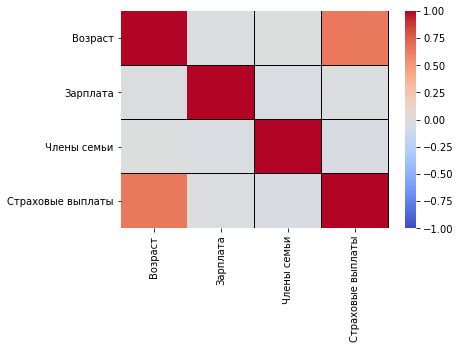

In [7]:
sns.heatmap(data.corr(), annot = False, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=0.003, linecolor='black')

In [8]:
df.duplicated().sum()

153

In [9]:
df= df.drop_duplicates()

In [10]:
df.duplicated().sum()

0

In [11]:
df.dtypes

Пол                    int64
Возраст              float64
Зарплата             float64
Члены семьи            int64
Страховые выплаты      int64
dtype: object

In [12]:
df['Возраст'] = df['Возраст'].astype(int)
df['Зарплата'] = df['Зарплата'].astype(int)

In [13]:
df.dtypes

Пол                  int64
Возраст              int64
Зарплата             int64
Члены семьи          int64
Страховые выплаты    int64
dtype: object

In [14]:
display(df)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41,49600,1,0
1,0,46,38000,1,1
2,0,29,21000,0,0
3,0,21,41700,2,0
4,1,28,26100,0,0
...,...,...,...,...,...
4995,0,28,35700,2,0
4996,0,34,52400,1,0
4997,0,20,33900,2,0
4998,1,22,32700,3,0


## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** ...

**Обоснование:** ...

Новая матрица признаков как произведение старой на матрицу (обратимую):

$$
X1 = X * P
$$

Подставим новое значение X1 в формулу w1:

$$
w1 = ((XP)^T XP)^{-1} (XP)^T y
$$

Раскроем первое произведение

$$
w1 = (P^T X^T XP)^{-1}P^T X^Ty
$$

Перегруппируем множители в скобках, чтобы это выглядело как произведение трех множителей:

$$
w1 = (P^T (X^T X)P)^{-1}P^T X^Ty
$$

Раскроем скобки

$$
w1 = P^{-1} (X^T X)P)^{-1}(P^T)^{-1} X^Ty
$$

Так как P по условию обратимая, переводим в E

$$
w1 = P^{-1} (X^T X)^{-1}EX^Ty = P^{-1} (X^T X)^{-1} X^Ty
$$

Подставим новое значение весов 𝑤1 в формулу для предсказаний линейной регрессии. Предсказания модели расчитываются по формуле:

$$
a = Xw
$$

Подставим в эту формулу значения X1 и w1 для того, чтобы на их основе вычислить предсказания модели a1:

$$
a1 = X1w1 = XPP^-1w
$$

Так как P по условию обратимая, то произведение PP1 снова равно E 

$$
a1 = XPP^{-1}w = XEw = Xw = a
$$

Мы доказали, что предсказания a1 для матрицы признаков, умноженных на обратимую матрицу P равны предсказаниям a.
Следовательно, отвечая на вопрос изменится ли качество линейной регрессии при умножении признаков на обратимую матрицу - нет, не изменится. В данном случае, параметры линейной регрессии в исходной задаче w и в преобразованной w1 связаны следующим образом:

$$
w1 = P^{-1}w
$$

При умножении признаков на обратимую матрицу, предсказания модели не поменяется, но поменяются веса для новых признаков. Придется переобучать модель на новых признаках.

## Алгоритм преобразования

In [15]:
features = df.drop('Страховые выплаты', axis = 1)
target = df['Страховые выплаты']

In [16]:
random_matrix = np.random.normal(100,size = (4, 4))
random_matrix

array([[100.17109995, 100.7115238 ,  99.96973155, 102.22652922],
       [ 99.94716992, 100.58372636, 101.77265351,  99.46468594],
       [101.60324168,  99.83101786, 101.0229168 , 100.14236577],
       [ 99.12446952,  99.53509916,  99.09893993,  98.56139964]])

In [17]:
matrix_inverted = np.linalg.inv(random_matrix)
matrix_inverted

array([[-0.22986407, -0.44215072,  0.39984889,  0.27835213],
       [-0.15682607, -0.15887741, -0.48106233,  0.81177009],
       [ 0.00095372,  0.55721345,  0.05659059, -0.62080766],
       [ 0.38859371,  0.04487124,  0.0267824 , -0.46539256]])

In [18]:
scaler = StandardScaler()
scaler.fit(features)

features_scaled = scaler.transform(features)

In [19]:
w = np.linalg.inv(features_scaled.T.dot(features_scaled)).dot(features_scaled.T).dot(target)

In [20]:
a = features_scaled @ w

In [21]:
features_scaled_p = features_scaled @ random_matrix

In [22]:
w1 = np.linalg.inv(features_scaled_p.T.dot(features_scaled_p)).dot(features_scaled_p.T).dot(target)

In [23]:
a1 = features_scaled_p @ w1

In [24]:
diff = a - a1

In [25]:
diff.sum()

-1.5934562155005272e-12

Исходя из полученных данных мы видим, что сумма расхождений совсем маленькая. Это значит 𝑎 равен 𝑎1. Мы доказали, что преобразование не приводит к разным предсказаниям модели и не ухудшает качество модели.

## Проверка алгоритма

In [26]:
model = LinearRegression(normalize = True)
model.fit(features, target)
predictions = model.predict(features)
mse = mean_squared_error(target, predictions)
print('MSE Score:', mse)
print('R2_Score на исходных данных: ',r2_score(target, predictions))

MSE Score: 0.1252726382276536
R2_Score на исходных данных:  0.4302010046633359


In [27]:
features_matrix = features_scaled @ random_matrix
model.fit(features_matrix, target)
predictions_matrix = model.predict(features_matrix)
mse = mean_squared_error(target, predictions)
print('MSE Score:', mse)
print('R2_Score для преобразованных  признаков: ',r2_score(target, predictions_matrix))

MSE Score: 0.1252726382276536
R2_Score для преобразованных  признаков:  0.4302010046633362


Вывод:

Исходя их полученных результатов, можно сказать, что преобразованные данные схожи с результатами исходных данных. То есть, мы защитили данные пользователей и при этом не ухудшили качество модели машинного обучения.

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные загружены
- [x]  Выполнен шаг 2: получен ответ на вопрос об умножении матриц
    - [x]  Указан правильный вариант ответа
    - [x]  Вариант обоснован
- [x]  Выполнен шаг 3: предложен алгоритм преобразования
    - [x]  Алгоритм описан
    - [x]  Алгоритм обоснован
- [x]  Выполнен шаг 4: алгоритм проверен
    - [x]  Алгоритм реализован
    - [x]  Проведено сравнение качества моделей до и после преобразования